<img src = 'https://www.hanbit.co.kr/data/books/B8475831198_l.jpg'>

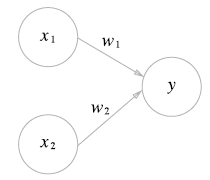

퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력.
퍼셉트론 신호는 흐른다(1) / 안흐른다(0) 두 가지 값을 가질 수 있다.

위 그림에서 x1, x2는 입력 신호, y는 출력 신호, w1과 w2는 가중치.
원을 뉴런 혹은 노드라고 부른다.

입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치가 곱해진다. (w1x1, w2x2)
뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력(뉴런의 활성화).
그 한계를 임계값이라 하며, 세타 기호로 표현

<img src = 'https://blog.kakaocdn.net/dn/bbz2Sz/btqEPlzdVNN/U1doKVEkSeQfA1W5OPNkqK/img.jpg'>

# 퍼셉트론 구현하기

In [19]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [20]:
print(AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1))

0 0 0 1


<img src = 'https://t1.daumcdn.net/cfile/tistory/9979C74F5B83619A28'>

세타를 -b로 치환하면 위와 같이 수식이 바뀐다.
여기서 b를 편향(bias)라 한다.

In [11]:
import numpy as np

x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7
w*x

array([0. , 0.5])

In [13]:
np.sum(w*x) + b # 대략 -0.2 (부동소수점 수에 의한 연산 오차)

-0.19999999999999996

## 편향을 도입한 AND, NAND, OR 게이트 구현

In [15]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else :
        return 1

편향 b는 가중치 w1, w2 와 기능이 다르다.
w1과 w2는 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수고,
편향은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력) 하느냐를 조정하는 매개변수다.

In [16]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else:
        return 1

## 퍼셉트론의 한계. XOR 게이트

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQc_dvOsymrVlpFrCzqzIAmgqTMLBadyc7rrw&usqp=CAU">

XOR 게이트는 x1과 x2 중 한쪽이 1일 때만 1을 출력.

<img src = 'https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F992152485B98A1C7051CAA'>

XOR 게이트를 만족하는 직선은 찾을 수 없다.
직선이라는 제약을 없앤다면 곡선으로는 1과 0을 나눌 수 있다.

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXABxQ8lvRKFXedeJAcoeiMnMoja_gHgckmLv663Ls6p7jODN__tVuUAZLi0yU_0T3PVM&usqp=CAU'>

# 다층 퍼셉트론

AND, NAND, OR 게이트를 조합하면 XOR 게이트를 만들 수 있다.
<img src = 'https://upload.wikimedia.org/wikipedia/commons/a/a2/254px_3gate_XOR.jpg'>

<img src = 'https://miro.medium.com/max/1748/1*qotAsPfK5l0kwynGKB134A.png'>

In [21]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y =AND(s1, s2)
    return y

In [22]:
XOR(0, 0), XOR(1, 0), XOR(0, 1), XOR(0, 0)

(0, 1, 1, 0)

XOR 퍼셉트론을 그림으로 표현하면 다음과 같다.

<img src = 'https://media.vlpt.us/post-images/dscwinterstudy/754c7c20-3a21-11ea-8734-d1dac55eae87/2-13XOR%EC%9D%98-%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.png'>

AND, OR가 단층 퍼셉트론인 데 반해, XOR는 2층 퍼셉트론이다.
이처럼 층이 여러 개인 퍼셉트론을 다층 퍼셉트론이라 한다.